In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#load the datas
dataframe = pd.read_csv("/content/btcNewsToPrice.csv")


In [ ]:
#print the first 5 rows of the dataset
dataframe.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_13,top_14,top_15,top_16,top_17,top_18,price,open,high,low
0,01-07-2015,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.6,264.1,265.0,254.4
1,02-07-2015,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,254.9,257.6,261.3,253.1
2,03-07-2015,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,255.4,254.9,256.7,252.4
3,04-07-2015,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.5,255.4,261.1,253.4
4,05-07-2015,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,270.1,260.5,274.1,257.6


In [ ]:
#describe the dataset
dataframe.describe()

,price,open,high,low
count,2169.000000,2169.000000,2169.000000,2169.000000
mean,8703.441540,8687.204564,8953.196312,8387.575426
std,12154.712336,12142.205973,12544.055708,11667.853971
min,211.400000,211.400000,226.600000,196.300000
25%,829.200000,827.300000,874.700000,808.600000
50%,6389.100000,6386.600000,6513.100000,6255.900000
75%,9585.200000,9580.300000,9773.200000,9343.000000
max,63540.900000,63544.200000,64778.000000,62067.500000


<Axes: >

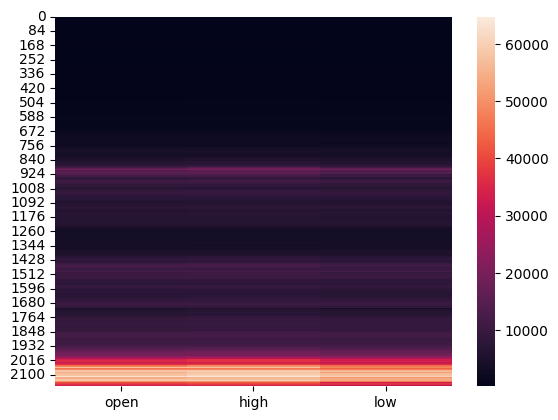

In [ ]:
#create a correlation matrix
import seaborn as sns
sns.heatmap(dataframe.iloc[:,-3:])

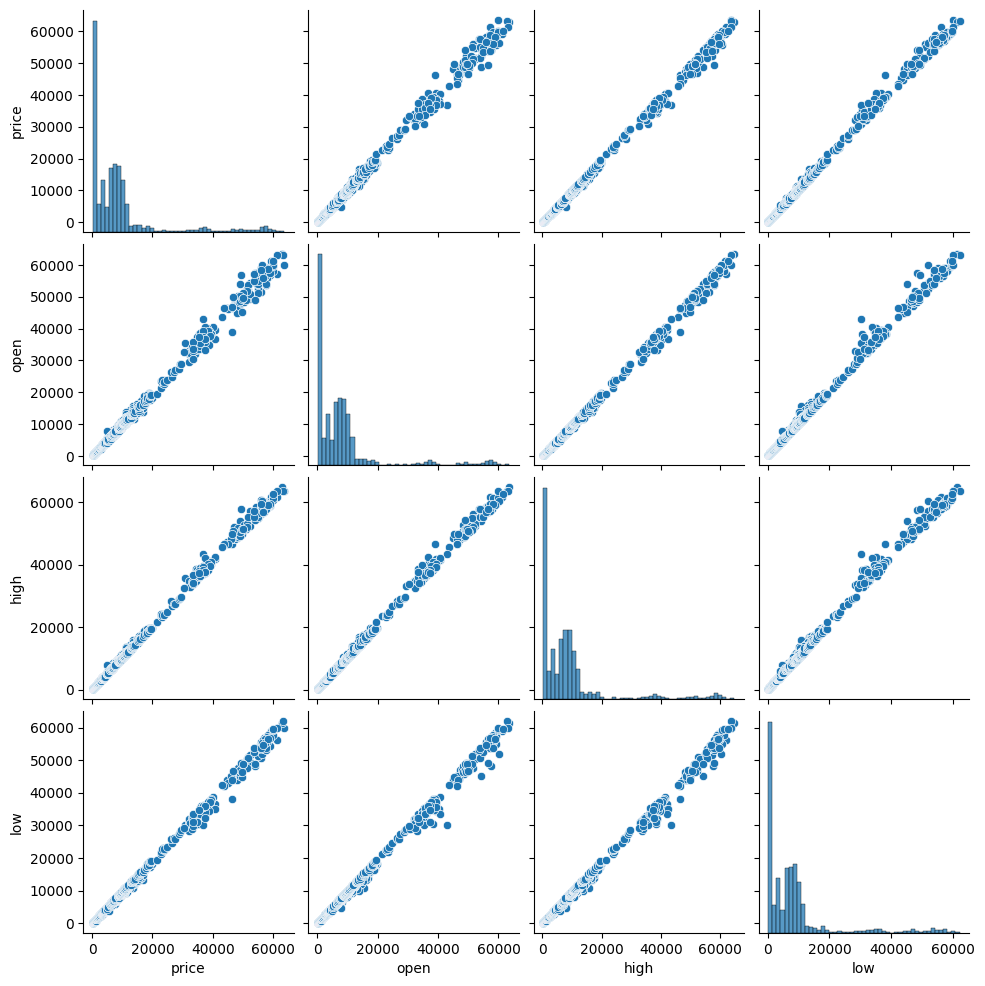

In [ ]:
#create a pair plot for the above matrix
sns.pairplot(dataframe)

In [ ]:
#data cleaning
#1. Remove the unwanted columns
dataframe.columns

Index(['date', 'top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6',
       'top_7', 'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13',
       'top_14', 'top_15', 'top_16', 'top_17', 'top_18', 'price', 'open',
       'high', 'low'],
      dtype='object')

In [ ]:
new_df = dataframe[['open','high','low','price']]
print(new_df)

         open     high      low    price
0       264.1    265.0    254.4    257.6
1       257.6    261.3    253.1    254.9
2       254.9    256.7    252.4    255.4
3       255.4    261.1    253.4    260.5
4       260.5    274.1    257.6    270.1
...       ...      ...      ...      ...
2164  33574.6  34047.8  31158.1  33382.9
2165  33385.5  37517.6  32428.6  37332.2
2166  37375.2  38340.8  35824.0  36649.4
2167  36654.3  37641.1  36003.3  37314.6
2168  37334.4  37437.3  34703.3  35467.5

[2169 rows x 4 columns]


In [ ]:
#drop the null rows
new_df.dropna()

,open,high,low,price
0,264.1,265.0,254.4,257.6
1,257.6,261.3,253.1,254.9
2,254.9,256.7,252.4,255.4
3,255.4,261.1,253.4,260.5
4,260.5,274.1,257.6,270.1
...,...,...,...,...
2164,33574.6,34047.8,31158.1,33382.9
2165,33385.5,37517.6,32428.6,37332.2
2166,37375.2,38340.8,35824.0,36649.4
2167,36654.3,37641.1,36003.3,37314.6


In [ ]:
#check for duplicated rows
new_df.drop_duplicates()

,open,high,low,price
0,264.1,265.0,254.4,257.6
1,257.6,261.3,253.1,254.9
2,254.9,256.7,252.4,255.4
3,255.4,261.1,253.4,260.5
4,260.5,274.1,257.6,270.1
...,...,...,...,...
2164,33574.6,34047.8,31158.1,33382.9
2165,33385.5,37517.6,32428.6,37332.2
2166,37375.2,38340.8,35824.0,36649.4
2167,36654.3,37641.1,36003.3,37314.6


In [ ]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
# prompt: create a training data with 70% and test data of 30%

X = new_df.drop('price', axis=1)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
#create a linear regression model
model = LinearRegression()

In [ ]:
#fit to the model
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
#predict the values
y_pred = model.predict(X_test)

In [ ]:
#calculate the r2_score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9994892546769841


In [ ]:
#calculate mean squared error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

86617.42572592218


In [ ]:
#calculate mean absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

115.49082976454308


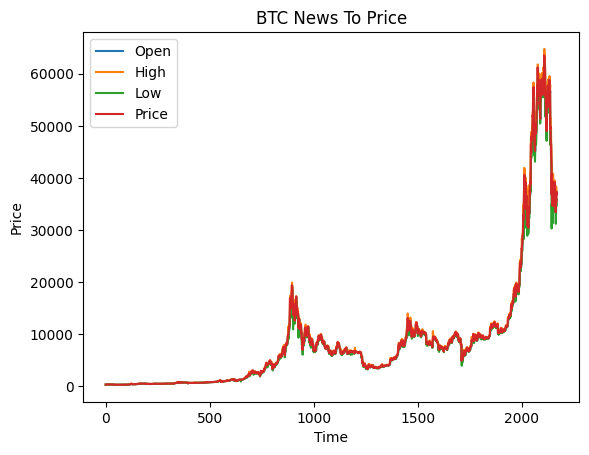

In [ ]:
# prompt: how to visualize the above dataframe using matplotlib

import matplotlib.pyplot as plt
# Visualize the dataframe using matplotlib

# Plot the open, high, low, and price columns
plt.plot(new_df['open'])
plt.plot(new_df['high'])
plt.plot(new_df['low'])
plt.plot(new_df['price'])

# Add a legend
plt.legend(['Open', 'High', 'Low', 'Price'])

# Add a title and labels
plt.title('BTC News To Price')
plt.xlabel('Time')
plt.ylabel('Price')

# Show the plot
plt.show()


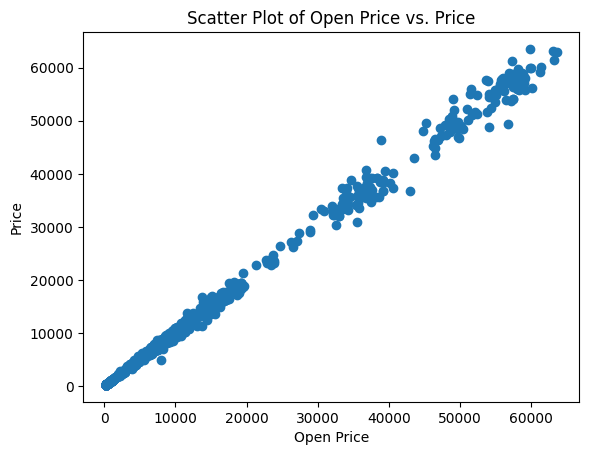

In [ ]:
# Create a scatter plot of the open price vs. the price
plt.scatter(new_df['open'], new_df['price'])
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.title('Scatter Plot of Open Price vs. Price')
plt.show()


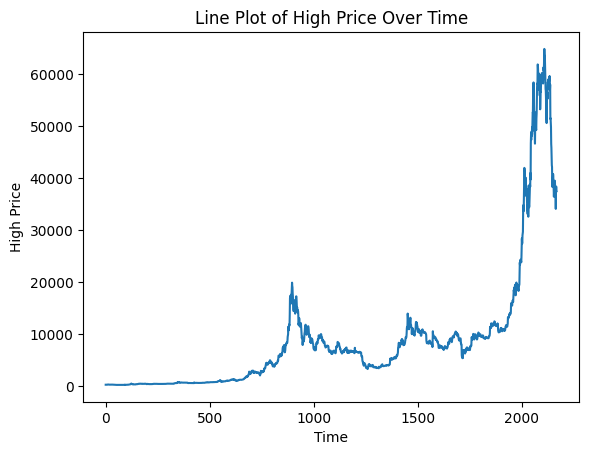

In [ ]:
# Create a line plot of the high price over time
plt.plot(new_df.index, new_df['high'])
plt.xlabel('Time')
plt.ylabel('High Price')
plt.title('Line Plot of High Price Over Time')
plt.show()

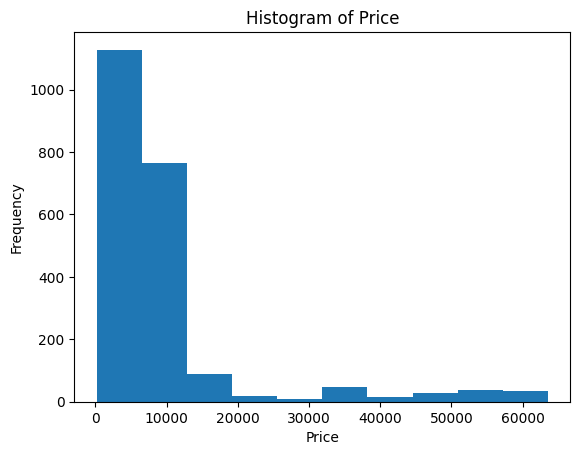

In [ ]:
# Create a histogram of the price data
plt.hist(new_df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

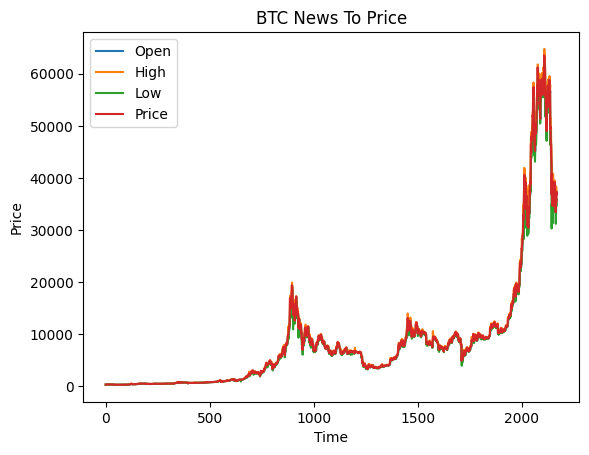

In [ ]:
import matplotlib.pyplot as plt
# Visualize the dataframe using matplotlib

# Plot the open, high, low, and price columns
plt.plot(new_df['open'])
plt.plot(new_df['high'])
plt.plot(new_df['low'])
plt.plot(new_df['price'])

# Add a legend
plt.legend(['Open', 'High', 'Low', 'Price'])

# Add a title and labels
plt.title('BTC News To Price')
plt.xlabel('Time')
plt.ylabel('Price')

# Show the plot
plt.show()

In [ ]:
# prompt: use adaboost for prediction

from sklearn.ensemble import AdaBoostRegressor

# Instantiate the AdaBoostRegressor model
model = AdaBoostRegressor(n_estimators=100, learning_rate=1.0)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_ada = model.predict(X_test)

# Calculate the r2_score
print(r2_score(y_test, y_pred_ada))

# Calculate the mean squared error
print(mean_squared_error(y_test, y_pred_ada))

# Calculate the mean absolute error
print(mean_absolute_error(y_test, y_pred_ada))


0.993200602256141
1153111.546048259
852.7002347312036


In [ ]:
#using Adaboost Module
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the AdaBoostRegressor model
model2 = AdaBoostRegressor(n_estimators=100, learning_rate=1.0)

# Fit the model to the training data
model2.fit(X_train, y_train)

# Predict the output for the test data
y_pred_ada = model2.predict(X_test)

# Calculate the r2_score
print(r2_score(y_test, y_pred_ada))

# Calculate the mean squared error
print(mean_squared_error(y_test, y_pred_ada))

# Calculate the mean absolute error
print(mean_absolute_error(y_test, y_pred_ada))

0.9930958679528934
1170873.4624549353
875.0494843018888


In [ ]:
#predict for a new category of data
model.predict([[255,256,257]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([1996.89654088])

In [ ]:
#for adaboost model
model2.predict(([[255,256,257]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([1990.55273775])

In [ ]:


from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(r2_score(y_test, y_pred))

# The accuracy of the decision tree model is lower than the accuracy of the linear regression model, but it is less likely to overfit to the training data.


0.9981989959060983


In [ ]:

import prophet
model4 = prophet.Prophet()


In [ ]:
model4.fit(X_train,y_train)

TypeError: Prophet.fit() takes 2 positional arguments but 3 were given

In [ ]:
#trying to use forecasting
df2 = dataframe[['date','price']]
df2

,date,price
0,01-07-2015,257.6
1,02-07-2015,254.9
2,03-07-2015,255.4
3,04-07-2015,260.5
4,05-07-2015,270.1
...,...,...
2164,08-06-2021,33382.9
2165,09-06-2021,37332.2
2166,10-06-2021,36649.4
2167,11-06-2021,37314.6


In [ ]:
# prompt: df2['date'] = pd.to_datetime(df2['date']) how to convert the %d-%m-%Y format

import pandas as pd
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')


<ipython-input-42-8035257773b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')


In [ ]:
df2['price'] = df2['price'].astype(int)
df2

<ipython-input-43-8f98f8c89dbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].astype(int)


,date,price
0,2015-07-01,257
1,2015-07-02,254
2,2015-07-03,255
3,2015-07-04,260
4,2015-07-05,270
...,...,...
2164,2021-06-08,33382
2165,2021-06-09,37332
2166,2021-06-10,36649
2167,2021-06-11,37314


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2169 non-null   datetime64[ns]
 1   price   2169 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.0 KB


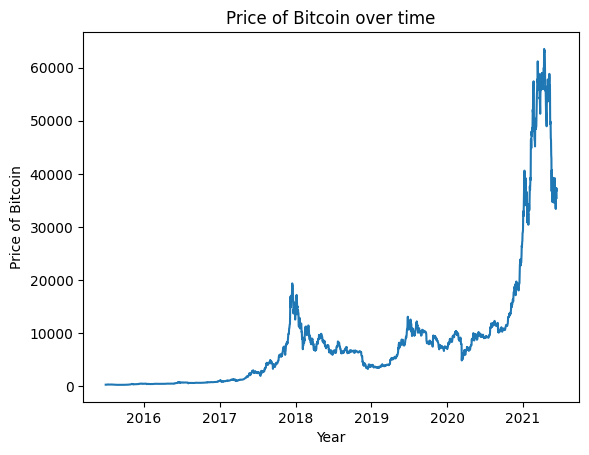

In [ ]:
plt.plot(df2['date'],df2['price'])
plt.xlabel("Year")
plt.ylabel("Price of Bitcoin")
plt.title("Price of Bitcoin over time")
plt.show()

In [ ]:
#renaming the columns
df2 = df2.rename(columns={'date': 'ds', 'price': 'y'})

In [ ]:
model4.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4p5gkil/u9nm6apw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4p5gkil/fbf0cd7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41444', 'data', 'file=/tmp/tmpf4p5gkil/u9nm6apw.json', 'init=/tmp/tmpf4p5gkil/fbf0cd7s.json', 'output', 'file=/tmp/tmpf4p5gkil/prophet_model_44ce490/prophet_model-20240628145228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model4.make_future_dataframe(periods=200,freq='D')
forecast = model4.predict(forecast)


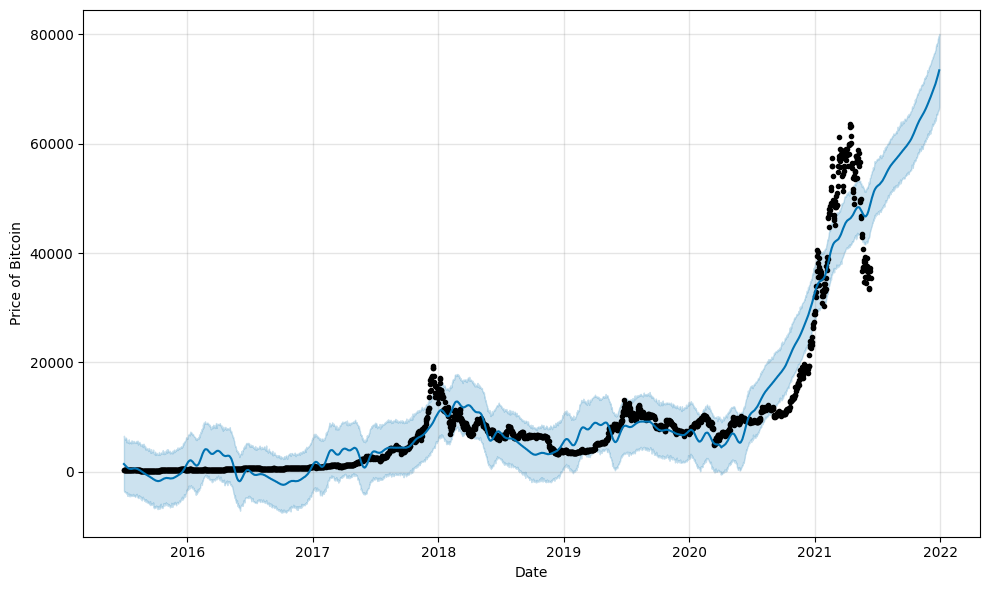

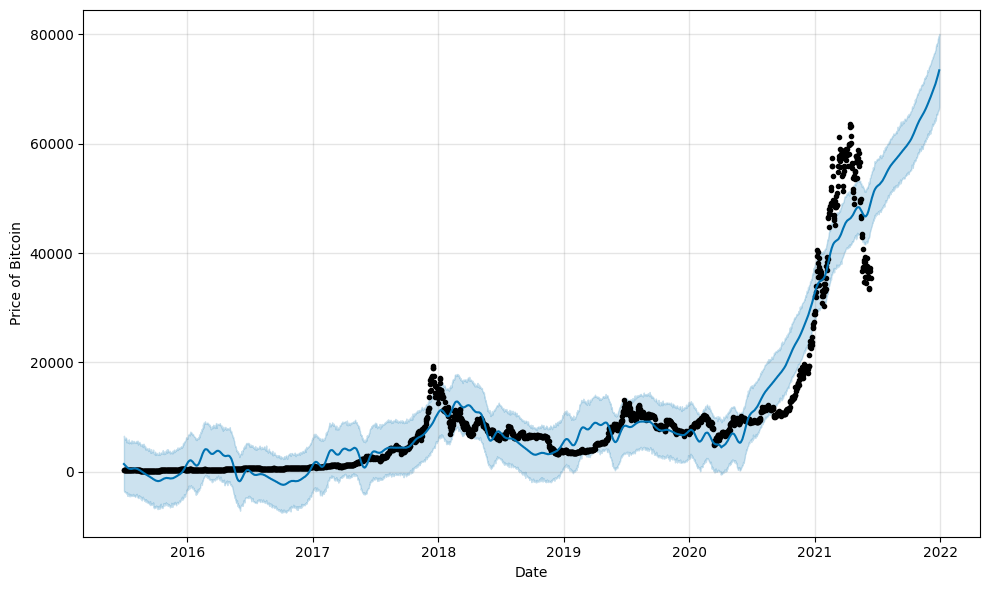

In [ ]:
model4.plot(forecast,xlabel = "Date",ylabel = "Price of Bitcoin")